<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib widget

import sxdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


mpl.rcParams["image.origin"] = "lower"
mpl.rcParams["font.family"] = "Liberation Sans"
mpl.rcParams["figure.dpi"] = 100

In [2]:
path_exp = "/data/id01/inhouse/edo/tutorial_data/"

name_sample = "ech_1_night1"
name_dset = "0010"

path_dset = (
    f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"
)
path_out = f"{path_exp}/{name_sample}_analysis"
path_qspace = f"{path_out}/qspace_shift_0.h5"

In [3]:
real_mask = np.ones((60, 60)).astype("bool")
real_mask[20:30, 20:30] = 0

In [4]:
reciprocal_mask = np.zeros((10, 10, 10)).astype("bool")
reciprocal_mask[2:6, 2:6, 2:7] = True  # rows, cols, depth
reciprocal_mask = ~reciprocal_mask

roi = np.where(~reciprocal_mask)
roi_slice = tuple([slice(x.min(), x.max() + 1) for x in roi])

In [5]:
real_mask.shape, reciprocal_mask.shape

((60, 60), (10, 10, 10))

In [7]:
roi_int = sxdm.process.math.calc_roi_sum(
    path_qspace, reciprocal_mask, mask_direct=real_mask
)

  0%|          | 0/40 [00:00<?, ?it/s]

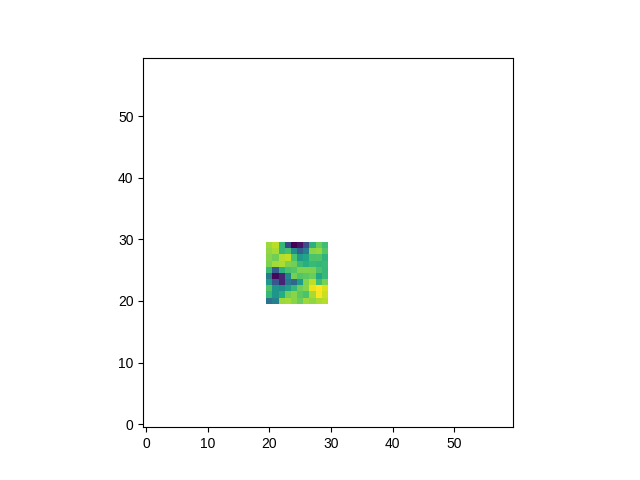

In [8]:
plt.figure()
plt.imshow(roi_int.reshape(60, 60))